## Naive Bayes Classification

- **Pros**: Fast, few tunable parameter, provide probabilistic prediction, classification algorithm. Performs well when for high dimensional dataset
- **Cons**: Make strong assumption about data
- -> Used for quick and dirty baseline for classification


- Concept: Find the probability of a label given some observed features

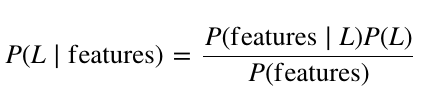

How to choose between label L1 or L2 ? Compute the following ratio:

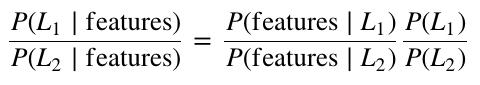

How to compute $Pr(features | L_i)$ ? Use a **"generative model"**

- Make "naive" assumptions about the generative model for each label. Different types of Bayes classifiers rest on different naive assumption about the data

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Classification probability for the first 5 samples: 
 [[1.    0.   ]
 [1.    0.   ]
 [0.895 0.105]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.153 0.847]]


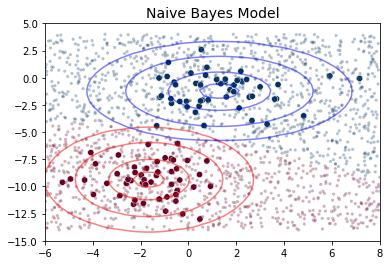

In [44]:
## Gaussian Naive Bayes

# The assumption is that data from each label is drawn from a simple Gaussian distribution
# Then, for each label, we only need to compute the mean and standard deviation

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(# Generate isotropic Gaussian blobs for clusting
    100, # n_samples
    2, # n_features
    centers = 2, # We want 2 different distribution
    random_state=2,
    cluster_std = 1.5
)

fig, ax = plt.subplots()
scatter = sns.scatterplot(X[:, 0], X[:, 1], c=y, s=40, ax=ax, cmap='RdBu')
scatter.set_title("Naive Bayes Model", size = 14)

xlim = (-8, 8)
ylim = (-15, 5)

# Build a grid
x_grid = np.linspace(xlim[0], xlim[1], 60) # Shape (60,)
y_grid = np.linspace(ylim[0], ylim[1], 40) # Shape (40,)

X_grid, Y_grid = np.meshgrid(x_grid, y_grid) # X and Y have shape(40, 60)
X_GRID = np.vstack([X_grid.ravel(), Y_grid.ravel()]) # X_grid has shape(2, 2'400)
X_GRID = X_GRID.T # X_grid has shape(2'400, 2)

for label, color in enumerate(['red', 'blue']): # For each label
    # Get the mean and standard deviation for the current lavel
    mask = (y == label) # X is a "special" array
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5*(X_GRID - mu)**2 / std**2).prod(1) # Gaussian distribution formula
    ax.contour(x_grid, y_grid,
               P.reshape(X_grid.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color,
               alpha=0.5)
    
# Ellipses = Gaussian Generative Model for each label, with larger probability around the center of the ellipse

# Gaussian Naive Bayes Model is implemented in Scikit
from sklearn.naive_bayes import GaussianNB

# Generate a test set
rng = np.random.RandomState(0)
X_test = [-6, -14] + [14, 18]*rng.rand(2000, 2)

model = GaussianNB()
model.fit(X, y)
y_model = model.predict(X_test)

p = sns.scatterplot(X_test[:, 0], X_test[:, 1], c = y_model, s = 10, alpha = 0.3, cmap='RdBu', ax=ax)
p.set(xlim = -6)

# Gaussian Naive Bayes also provides probabilistic classification
y_model_proba = model.predict_proba(X_test)
print("Classification probability for the last 10 samples: \n", np.round(y_model_proba[-10:], 3))

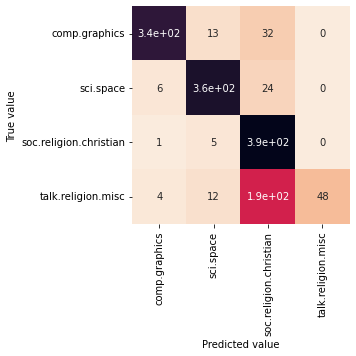

In [71]:
## Multinomial Naive Bayes

# Assume features are generated from a simple multinomial distribution (generalization of binomial distribution)
# Roll a k-sided dice n times
# n = 1, k = 2 --> Bernoulli
# n > 1, k = 2 --> Binomial
# n > 1, k > 2 --> Multinomial
# Good choice when features represents counts (e.g. Text classification)

# Get a text dataset
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics'] # Categories to select from data
train = fetch_20newsgroups(subset='train', categories = categories)
test = fetch_20newsgroups(subset='test', categories = categories)

# Convert the content of each sample into vector of number using TF-IDF Vactorizer & Create pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),
                      MultinomialNB())

# Fit to data and get predictions
model.fit(train.data, # X_train
          train.target) # y_train
y_model = model.predict(test.data) # X_test

# Evaluate the prediction with the Confusion Matrix (measure quality of a classifier
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test.target, y_model)
heat_map = sns.heatmap(conf_matrix,
                        square=True,
                        annot=True,
                        cbar = False,
                        xticklabels=test.target_names,
                        yticklabels=test.target_names,
                        cmap = sns.cm.rocket_r)
heat_map.set(xlabel = 'Predicted value',
             ylabel = 'True value');

In [77]:
def predict_category(s, train=train, model=model):
    "Return the prediction target name for a single string"
    prediction = model.predict([s])
    return train.target_names[prediction[0]]

predict_category('sending a payload to the ISS')

'sci.space'

#### Concept Summary:
    
- Gaussian Naive Bayes: Assume samples are drawn form a Gaussian distribution
- Multinomial Naive Bayes: Asumme samples are drawn from a Multinomal distribution
- Confusion Matrix: Mesure quality of a classifier model